In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from utils.feature_engineering import preprocess, preprocess_topics
from database.main import Database
db = Database()

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def wordcloud(text, title):
    
    wordcloud = WordCloud(
        background_color='white',
        scale=3,
        max_words=200,
        max_font_size=40
    ).generate(str(text))

    fig = plt.figure(1, figsize=(10, 7))
    
    
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=1.1)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
df = db.read_articles()
df = preprocess(df)
df.head()

[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,title,content,topics,published_on
0,lifeandstyle,"[pandemic, epiphany, id, happy, parent, fulltime]","[back, february, fellow, mom, oneyearold, disc...","[family, my pandemic epiphany, child, parents ...",2020-06-12 06:45:54.008
1,sport,"[afl, still, facing, significant, financial, c...","[afl, season, resumption, delivered, recordbre...","[afl, australian rules football, australia spo...",2020-06-12 06:45:54.005
2,global-development,"[global, protest, throw, spotlight, alleged, p...","[student, eden, armando, bebari, 19, allegedly...","[human rights, black lives matter movement, ge...",2020-06-12 06:45:54.002
3,sport,"[héritier, lumumba, reject, collingwoods, offe...","[héritier, lumumba, say, intention, facilitati...","[afl, australian rules football, australia spo...",2020-06-12 06:45:54.005
4,politics,"[brexit, uk, expected, backtrack, full, eu, bo...","[government, expected, backtrack, plan, introd...","[brexit, european union, news]",2020-06-12 06:45:54.001


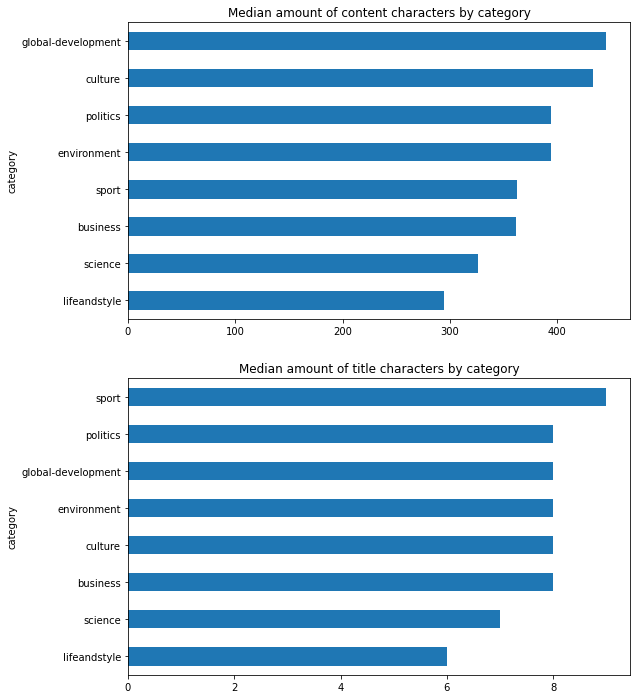

In [23]:
df['cnt_char_amt'] = df['content'].apply(len)
df['title_char_amt'] = df['title'].apply(len)

group = df.groupby("category")
content_char_avg = group['cnt_char_amt'].apply(np.median)
title_char_avg = group['title_char_amt'].apply(np.median)


fig, ax = plt.subplots(2, 1, figsize=(9, 12))

content_char_avg.sort_values().plot(kind='barh', ax=ax[0])
ax[0].set_title("Median amount of content characters by category")

title_char_avg.sort_values().plot(kind='barh', ax=ax[1])
ax[1].set_title("Median amount of title characters by category")


plt.rc('font', size=13) 
plt.show()

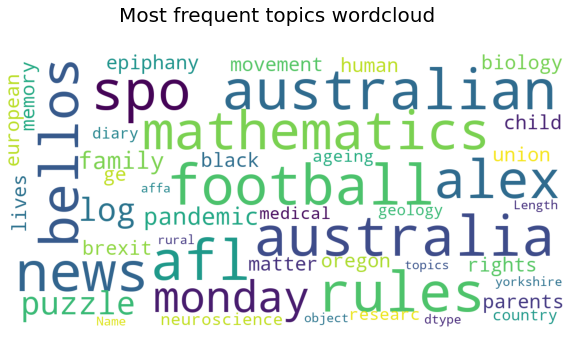

In [25]:
wordcloud(df['topics'], title="Most frequent topics wordcloud")

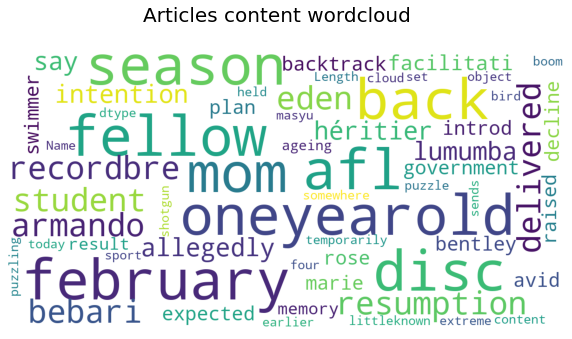

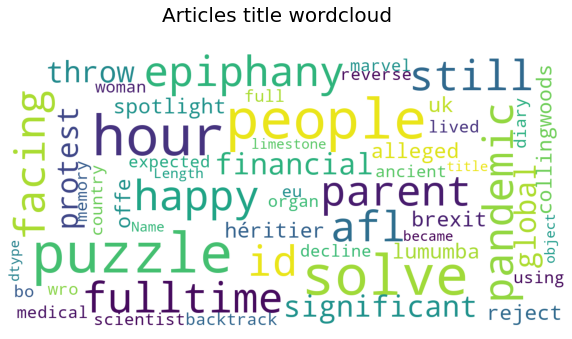

In [27]:
wordcloud(df['content'], title="Articles content wordcloud")
wordcloud(df['title'], title="Articles title wordcloud")

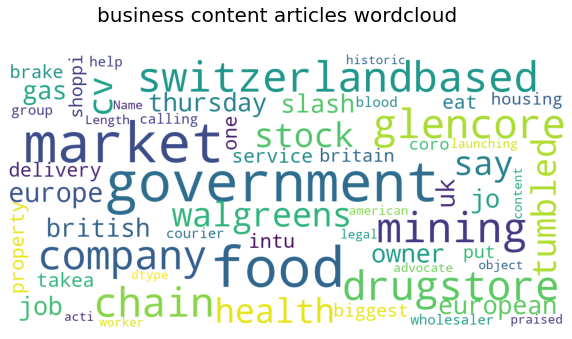

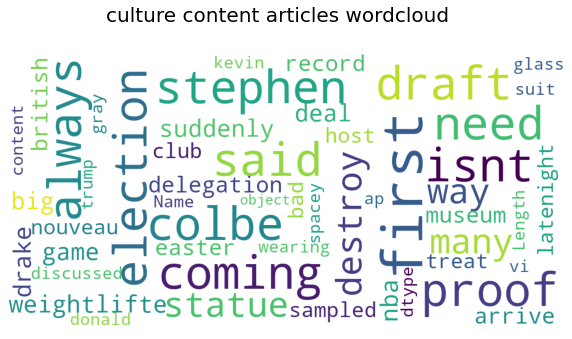

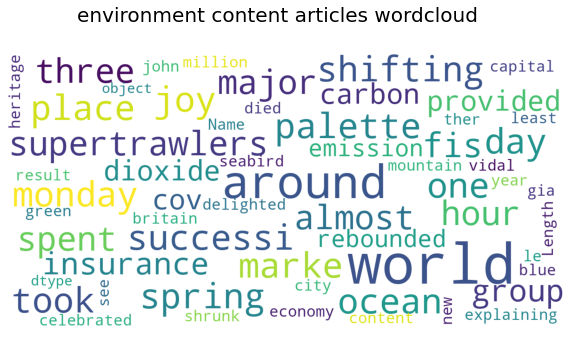

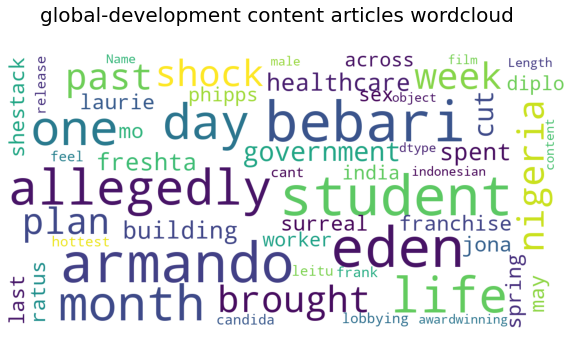

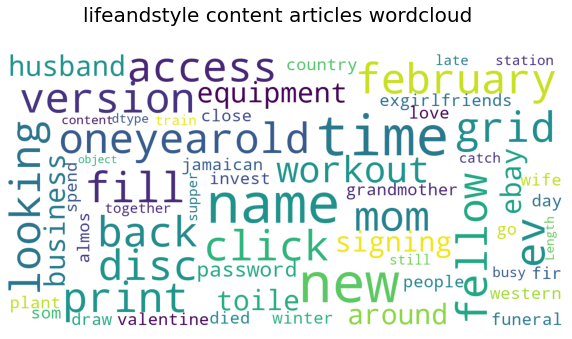

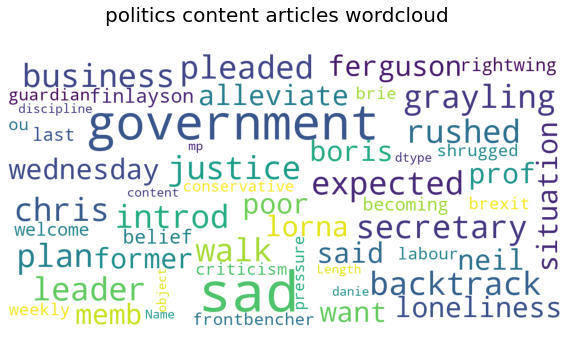

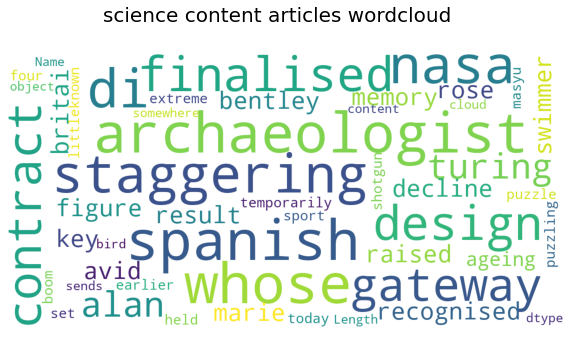

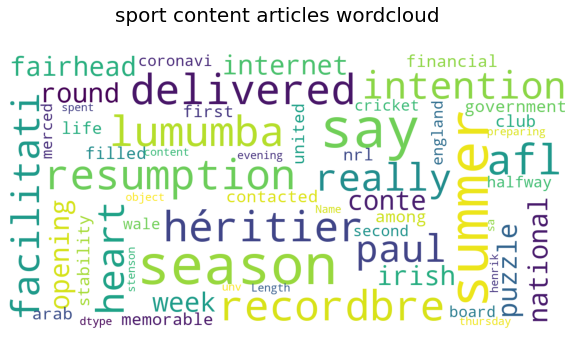

In [28]:
for group, data in df.groupby("category"):
    wordcloud(data['content'], title=f"{group} content articles wordcloud")

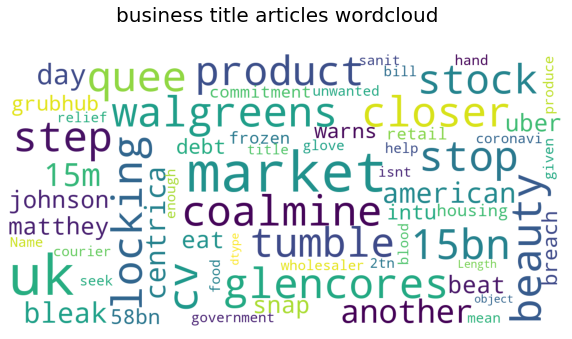

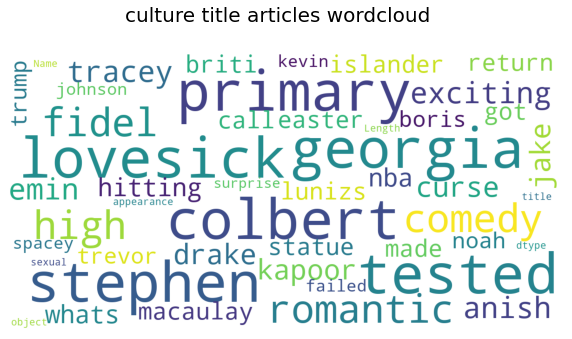

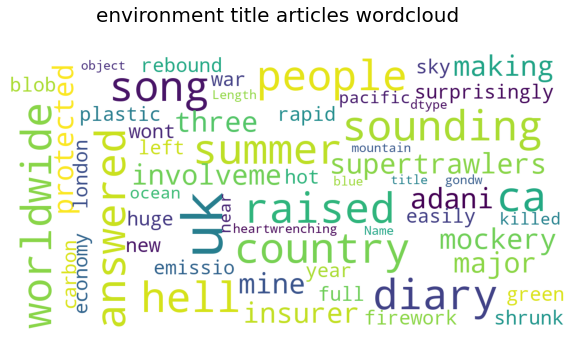

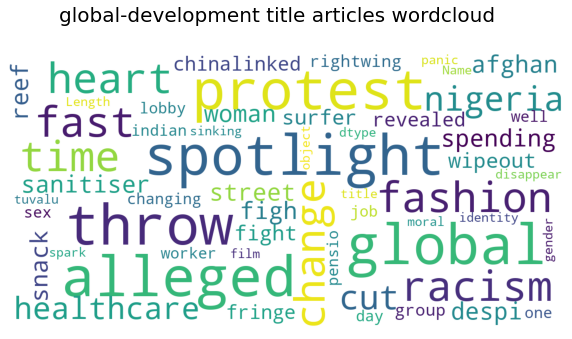

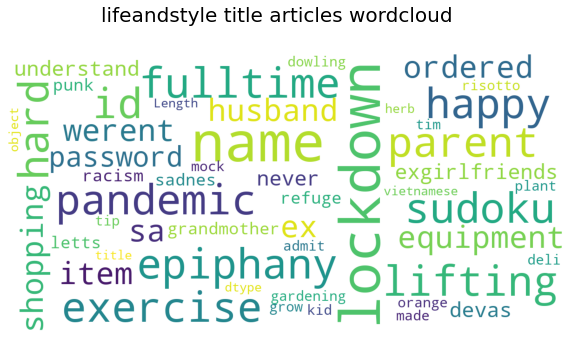

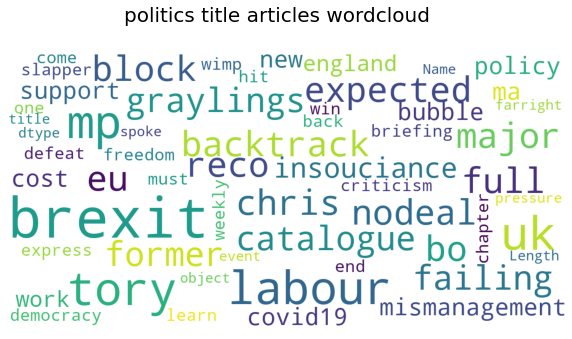

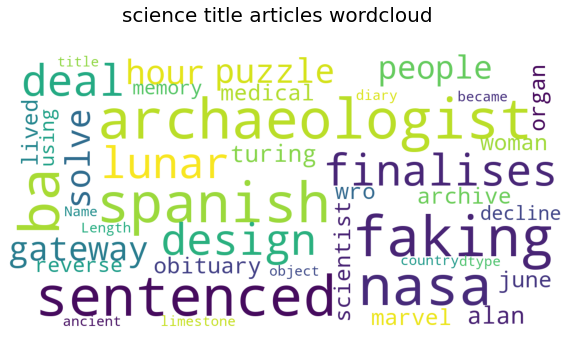

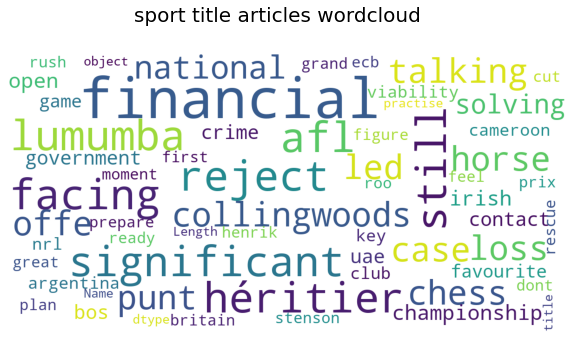

In [29]:
for group, data in df.groupby("category"):
    wordcloud(data['title'], title=f"{group} title articles wordcloud")